## California's Camp Fire 2018 - Wildfire Analysis

In [2]:
import pandas as pd

In [ ]:
import arcgis
from arcgis import *
from arcgis.mapping import MapImageLayer

In [1]:
gis = GIS('https://pythonapi.playground.esri.com/portal', 'arcgis_python', 'amazing_arcgis_123')

NameError: name 'GIS' is not defined

In [2]:
from arcgis.gis import GIS

In [3]:
gis = GIS('https://pythonapi.playground.esri.com/portal', 'arcgis_python','amazing_arcgis_123')

In [4]:
gis

GIS @ https://pythonapi.playground.esri.com/portal version:10.3

In [5]:
import arcgis
from arcgis import *
from arcgis.mapping import MapImageLayer

<Item title:"Landsat GLS Multispectral" type:Imagery Layer owner:esri_livingatlas>
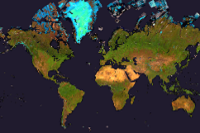

In [6]:
landsat_item = gis.content.search('title:Multispectral Landsat', 'Imagery Layer', outside_org=True)[0]
landsat = landsat_item.layers[0]
landsat_item

In [ ]:
https://livingatlas.arcgis.com/landsatexplorer/#mapCenter=-121.64024%2C39.80012%2C10.854&mode=swipe&mainScene=2018-11-08%7CUrban+with+DRA%7C8468784&secondaryScene=2018-10-07%7CUrban+with+DRA%7C8429660

In [7]:
aoi = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'type': 'extent', 
       'xmax': -13305000, 'xmin': -13315000, 'ymax': 4106000, 'ymin': 4052000}

arcgis.env.analysis_extent = {"xmin":-13337766,"ymin":4061097,"xmax":-13224868,"ymax":4111469,
                              "spatialReference":{"wkid":102100,"latestWkid":3857}}

landsat.extent = aoi

In [8]:
import pandas as pd
from datetime import datetime

selected = landsat.filter_by(where="(Category = 1)",
                             time=[datetime(2017, 11, 15), datetime(2018, 1, 1)],
                             geometry=arcgis.geometry.filters.intersects(aoi))

df = selected.query(out_fields="AcquisitionDate, GroupName, CloudCover, DayOfYear", 
                    order_by_fields="AcquisitionDate").sdf
df['AcquisitionDate'] = pd.to_datetime(df['AcquisitionDate'], unit='ms')
df.tail(5)

Empty DataFrame
Columns: [OBJECTID, AcquisitionDate, GroupName, CloudCover, DayOfYear, Shape]
Index: []

In [16]:
from html import html
# create an anchor tag
a = html('https://livingatlas.arcgis.com/landsatexplorer/#mapCenter=-121.64024%2C39.80012%2C10.854&mode=swipe&mainScene=2018-11-08%7CUrban+with+DRA%7C8468784&secondaryScene=2018-10-07%7CUrban+with+DRA%7C8429660')
# add the anchor tag to the notebook
print(a)

ImportError: cannot import name 'html' from 'html' (C:\Users\lisam\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\Lib\html\__init__.py)

In [20]:
prefire = landsat.filter_by('OBJECTID=2202594') # 2017-11-23 
midfire = landsat.filter_by('OBJECTID=2210579') # 2017-12-09 

In [22]:
from IPython.display import display, HTML

In [23]:
from IPython.display import IFrame

IFrame(src='https://livingatlas.arcgis.com/landsatexplorer/#mapCenter=-121.64024%2C39.80012%2C10.854&mode=swipe&mainScene=2018-11-08%7CUrban+with+DRA%7C8468784&secondaryScene=2018-10-07%7CUrban+with+DRA%7C8429660', width=700, height=600)

from IPython.display import display, Markdown
display(Markdown("[esri]"))(https://livingatlas.arcgis.com/landsatexplorer/#mapCenter=-121.64024%2C39.80012%2C10.854&mode=swipe&mainScene=2018-11-08%7CUrban+with+DRA%7C8468784&secondaryScene=2018-10-07%7CUrban+with+DRA%7C8429660)

In [21]:
%%html
<a href="https://livingatlas.arcgis.com/landsatexplorer/#mapCenter=-121.64024%2C39.80012%2C10.854&mode=swipe&mainScene=2018-11-08%7CUrban+with+DRA%7C8468784&secondaryScene=2018-10-07%7CUrban+with+DRA%7C8429660">Before and After Landsat Imagery</a>

In [18]:
from IPython.display import display, HTML
url = 'https://livingatlas.arcgis.com/landsatexplorer/#mapCenter=-121.64024%2C39.80012%2C10.854&mode=swipe&mainScene=2018-11-08%7CUrban+with+DRA%7C8468784&secondaryScene=2018-10-07%7CUrban+with+DRA%7C8429660'
text = 'Before and After Landsat 8 Imagery'
link = f'{text}'
display(HTML(link))

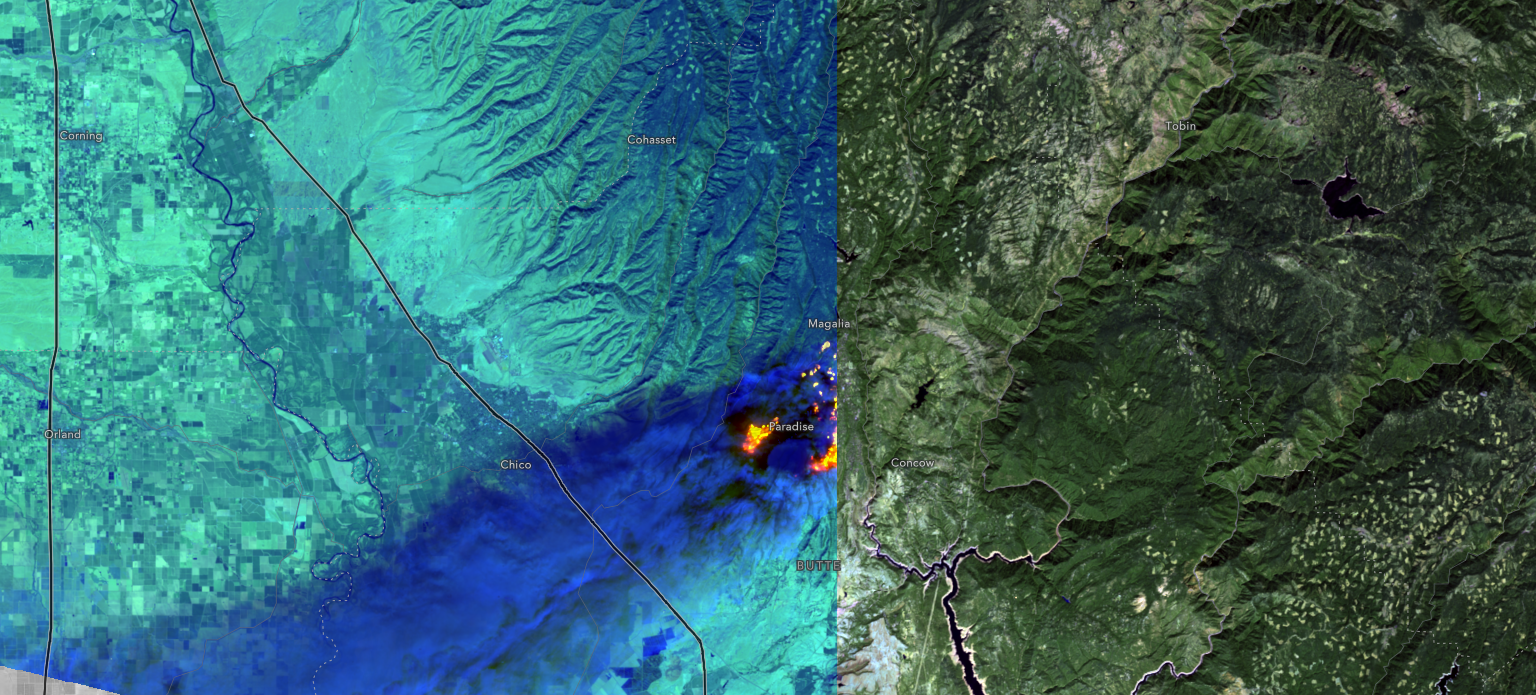

In [9]:
from IPython import display
display.Image(r"C:\Users\lisam\Desktop\Wildfires\swipe_camp_fire.png")

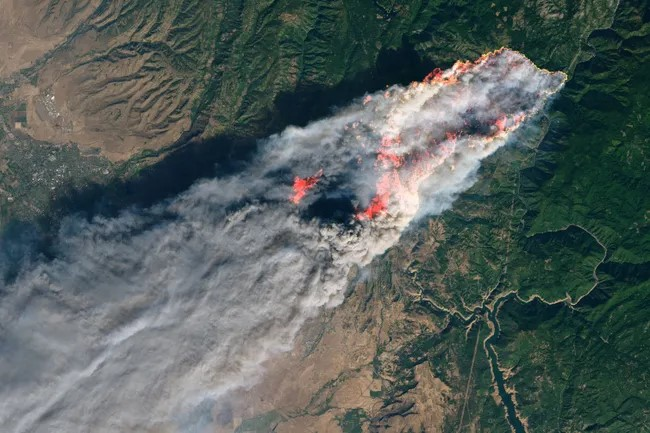

In [71]:
from IPython import display
display.Image(r"C:\Users\lisam\Desktop\Wildfires\DATA\Camp Fire\CAMPFIRELANDSAT-IMAGE ONLY.jpeg")

<center><img src="\Users\lisam\Desktop\Wildfires\DATA\Camp Fire\CAMPFIRELANDSAT-IMAGE ONLY.jpeg"/></center>

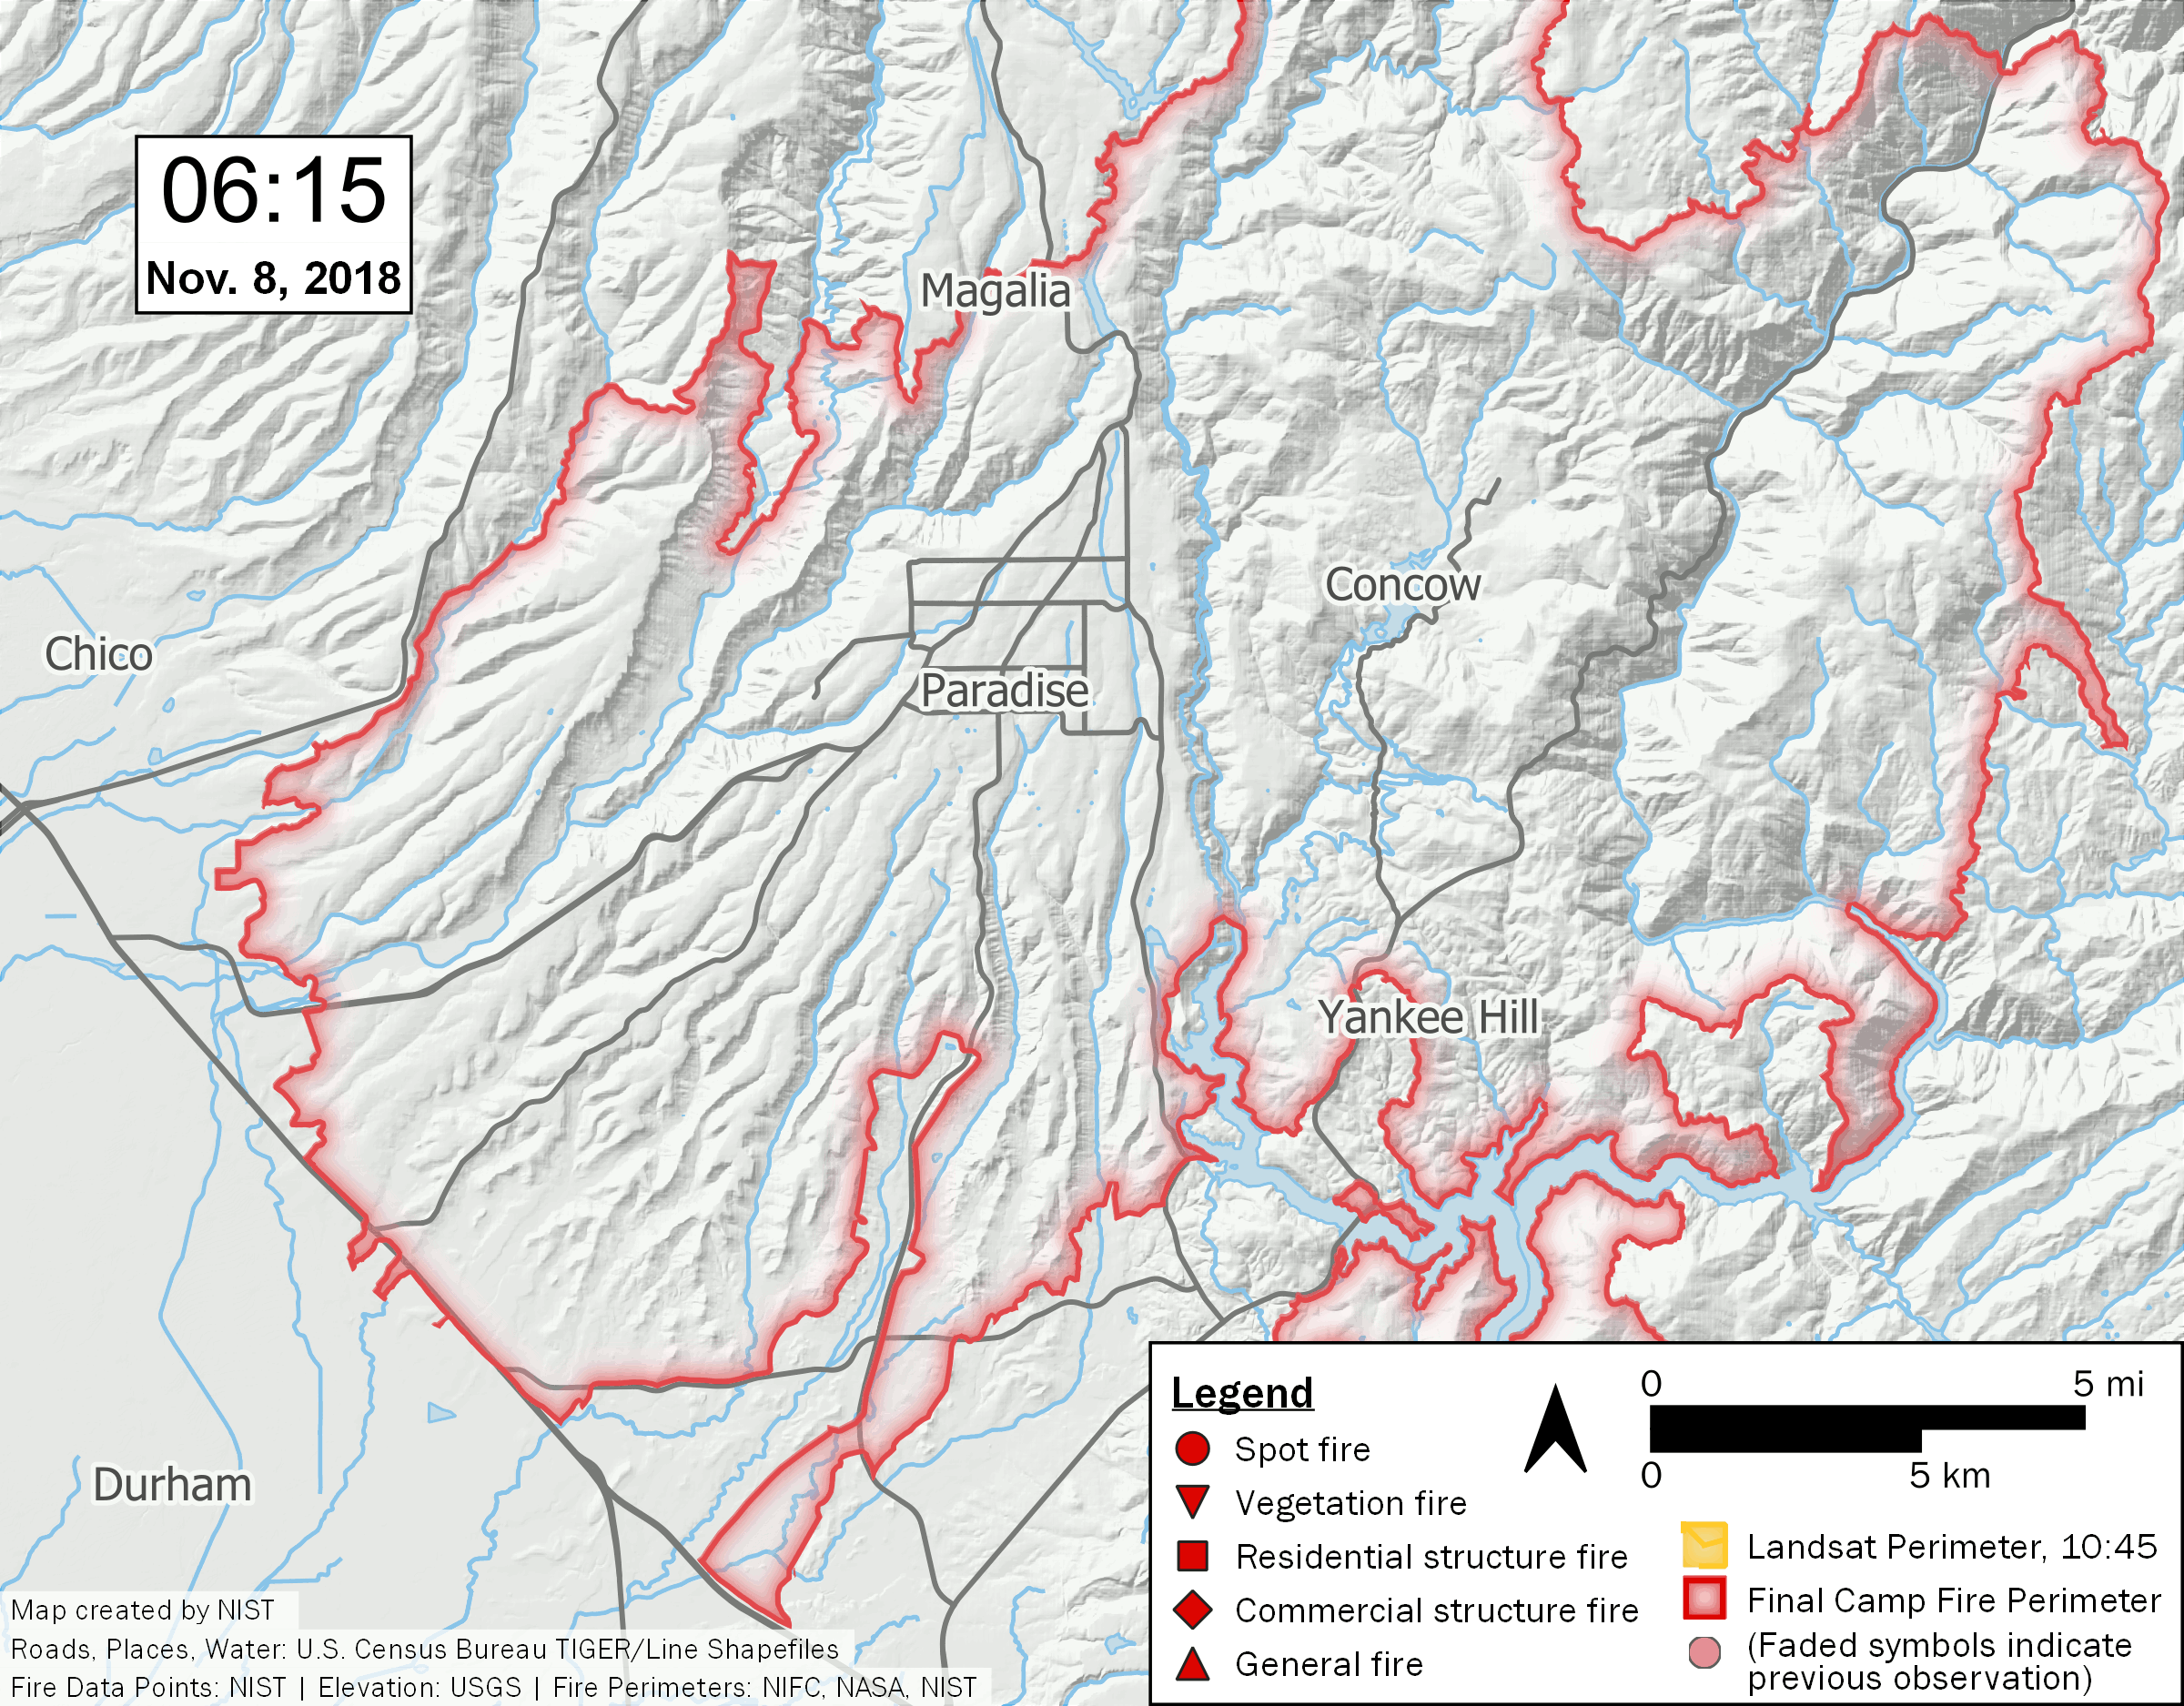

In [43]:
from IPython.display import Image
Image(r"C:\Users\lisam\Desktop\Wildfires\DATA\Camp Fire\data_animation_legend.gif")  